<a href="https://colab.research.google.com/github/PratibhaPachare/task-7q/blob/main/TASK7_Assignment14(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

**Importing the dataset**

In [ ]:
# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/CSV FILES/TASK7/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Configuration of the DataFrame.
df.shape

(400, 5)

In [ ]:
# Information of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
# Descriptive statistics of the Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [ ]:
# Checking for duplicate rows.
df.duplicated().sum()

0

In [ ]:
# Checking for missing values.
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
# Count of values in 'Purchased' column
print(f"Count of values in 'Purchased' column:\n{Counter(df.Purchased)}")

Count of values in 'Purchased' column:
Counter({0: 257, 1: 143})


In [ ]:
# Compute a simple cross-tabulation of two (or more) factors. 
# By default computes a frequency table of the factors 
pd.crosstab(df.Gender,df.Purchased)

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


**Splitting the dataset into the Training set and Test set**

In [ ]:
# Splitting the dataset into Training Dataset and Testing Dataset.
X = df.iloc[:, [2, 3]]
y = df.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1,stratify=df['Purchased'])

**Feature Scaling**

In [ ]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Fitting SVM to the Training set**

In [ ]:
# Fitting SVM to the Training set using Kernel as rbf.
cls = SVC(kernel='rbf',random_state=0)
cls.fit(X_train, y_train)

SVC(random_state=0)

**Predicting the Test set results**

In [ ]:
# Predicting the Test set results
y_pred = cls.predict(X_test)

**Making the Confusion Matrix**

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[58,  6],
       [ 4, 32]])

In [ ]:
# Accuracy Score
print('Accuracy of the SVM Model is:', round(accuracy_score(y_test, y_pred),3))

Accuracy of the SVM Model is: 0.9


In [ ]:
# Classification Report
print('Classification Report of the SVM Model:\n') 
print(classification_report(y_test, y_pred))

Classification Report of the SVM Model:

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        64
           1       0.84      0.89      0.86        36

    accuracy                           0.90       100
   macro avg       0.89      0.90      0.89       100
weighted avg       0.90      0.90      0.90       100



**Visualising the Training set results**

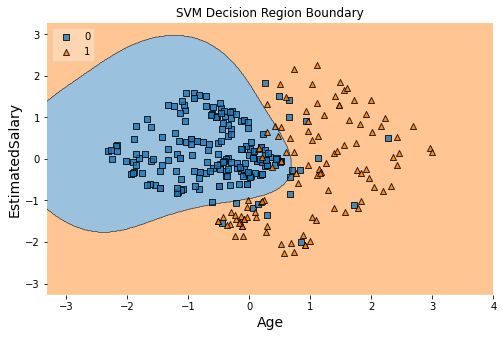

In [ ]:
# Decision Boundary-->Visualizing the Train set results
plt.figure(figsize=(8,5))
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
cls.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train.values, clf=cls, legend=2)
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=12)
plt.show()

**Visualising the Test set results**

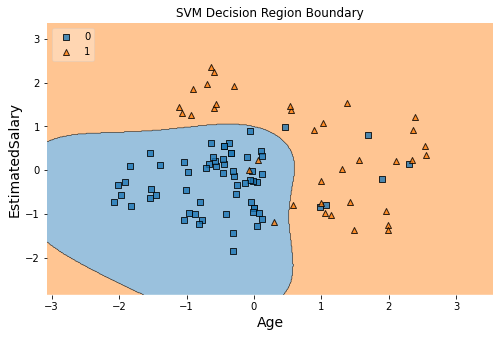

In [ ]:
# Decision Boundary-->Visualizing the Test set results
plt.figure(figsize=(8,5))
pca = PCA(n_components = 2)
X_test2 = pca.fit_transform(X_test)
cls.fit(X_test2, y_test)
plot_decision_regions(X_test2, y_test.values, clf=cls, legend=2)
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=12)
plt.show()
